# SIA

##### @author: Anne Hermann

## Overview: 
    Set up variables for the SIA model.
    Create the geometry on an artifical ice sheet and discretize it. 
    Plot the velocity, heights and over time.
    
    Assumption: 1. velocity at base is equal to zero.
                2. the bed is constant along the x axis.
                3. height at left and right boundary is zero

In [221]:
import SIA as sia
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [222]:
# Enable interactive notebook
%matplotlib notebook

In [223]:
# --------------------------  initialize variables  -------------------------- 
n = 3           # Glens flow law
rho = 910       # kg m^-3
A = 10E-15      # a^-1 Pa^-3 
g = 9.81        # m s^-2
a = 0

In [224]:
# -------------------------      Discretization      ------------------------- 
# grid in x dir.
delta_x = 5
x_lim = 100
bed = np.arange(-x_lim,x_lim+1,delta_x)
boundary = np.array([0,0])

# time discretization
t_0=0
N=10001
delta_t=0.5

In [225]:
# ----------------------------     Elevation      ----------------------------
#TODO: look for a better initial ice sheet
base = 3*np.sin(bed*0.01*np.pi)
surface = -0.001*bed**2+12

In [226]:
# --------------------------   SIA Solution Plot   --------------------------- 
# calculate solution
h,v,Q = sia.solution(base,surface,boundary,a,delta_x,delta_t,t_0,N,n,rho,A,g)

<IPython.core.display.Javascript object>


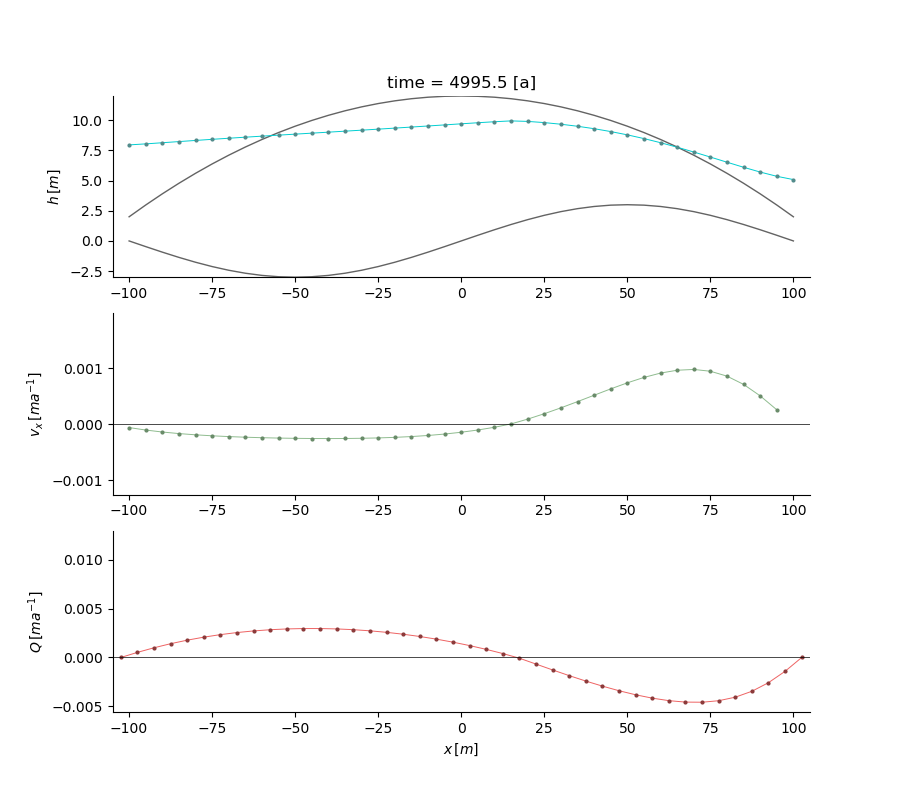

In [227]:
# Create plots
fig,ax=plt.subplots(3,figsize=(9, 8))
ax[0].plot(bed,surface,"-",color=(99/255,99/255,99/255),linewidth=1)
ax[0].plot(bed,base,"-",color=(99/255,99/255,99/255),linewidth=1)
line1,=ax[0].plot([],".-",color=(0/255,206/255,209/255),
                  markerfacecolor=(82/255,139/255,139/255),
                  markeredgecolor=(82/255,139/255,139/255),markersize=4, linewidth=.7)
line2,=ax[1].plot([],".-",color=(143/255,188/255,143/255),
                  markerfacecolor=(105/255,139/255,105/255),
                  markeredgecolor=(105/255,139/255,105/255),markersize=4,linewidth=.7)
line3,=ax[2].plot([],".-",color=(238/255,99/255,99/255),
                  markerfacecolor=(139/255,58/255,58/255),
                  markeredgecolor=(139/255,58/255,58/255),markersize=4,linewidth=.7)

ax[0].set_xlim(-100-delta_x,100+delta_x)
ax[0].set_ylim(np.min(base),np.max(h))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].set_xlim(-100-delta_x,100+delta_x)
ax[1].set(ylabel=r"$v_x\,[ma^{-1}]$")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].axhline(y=0, color='k',linewidth=.5)

ax[2].set_xlim(-100-delta_x,100+delta_x)
ax[2].set(ylabel=r"$Q\,[ma^{-1}]$",xlabel=r"$x\,[m]$")
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].axhline(y=0, color='k',linewidth=.5)

def animate_h(frame_num):
    ax[0].set(title = f"time = {t_0+frame_num*delta_t} [a]",ylabel=r"$h\,[m]$")
    line1.set_data((bed,h[frame_num]))
    return line1

def animate_v(frame_num):
    v_min = np.min(v[frame_num])-0.001
    v_max = np.max(v[frame_num])+0.001
    ax[1].set_ylim([v_min, v_max])
    line2.set_data((bed[0:len(bed)-1],v[frame_num]))
    return line2

def animate_Q(frame_num):
    Q_min = np.min(Q[frame_num])-0.001
    Q_max = np.max(Q[frame_num])+0.01
    ax[2].set_ylim([Q_min, Q_max])
    #x=np.append([-100-delta_x],bed)
    line3.set_data((np.arange(-100-delta_x/2,100+3/2*delta_x,delta_x),Q[frame_num]))
    return line3

anim1=FuncAnimation(fig,animate_h,frames=range(1,N,10),repeat=False,interval=10)
anim2=FuncAnimation(fig,animate_v,frames=range(1,N,10),repeat=False,interval=10)
anim3=FuncAnimation(fig,animate_Q,frames=range(1,N,10),repeat=False,interval=10)
plt.show()